# Predicting Loan Defaults w/ Natural Language Processing (NLP) #
## 1.0 Data Exploration ##

Created on Tues Feb 12 10:35:21 2019

@author: Greenwood Group

## STEP 1: Exploratory Data Analysis ##

### 1.1 Import required libraries ###

In [1]:
#import ducttape # "Duct tape. I need it for .. taping something."

import os
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# ### Turn off Depreciation and Future warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

% matplotlib inline

pd.set_option('precision', 3) # set the precision of numerical representation
pd.set_option('expand_frame_repr', True)

### 1.2 Prepare for reproducability ###

In [2]:
# Set random seed to maintain reproducability
random_state = np.random.seed(42)

# Set the plotting style
plt.style.use('seaborn-whitegrid')

sns.set(style="whitegrid", palette="PRGn", color_codes=True, font='sans-serif', font_scale=1.5)

### 1.3 Import data ###

In [3]:
# Import the dataset
# Set the path to data
filename = '../data/raw/kiva.csv'

# Read the data into memory
%time df = pd.read_csv(filename)

CPU times: user 106 ms, sys: 16 ms, total: 122 ms
Wall time: 127 ms


### 1.4 Summary Data Statistics ###

In [4]:
# Describe the data
print(df.describe().T)

              count     mean      std   min    25%    50%    75%     max
loan_amount  7988.0  708.774  585.049  25.0  375.0  600.0  925.0  5000.0


In [5]:
# Describe the ahape of the data
print("\nNumber of rows in the raw data: {}".format(df.shape[0]))
print("Number of columns in the raw data: {}\n".format(df.shape[1]))


Number of rows in the raw data: 7988
Number of columns in the raw data: 7



In [6]:
# View top n-rows data
df.head(5)

,status,sector,en,country,gender,loan_amount,nonpayment
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender


In [7]:
# View last n-rows of data
df.tail(5)

,status,sector,en,country,gender,loan_amount,nonpayment
7983,paid,Clothing,Rosa is a member of the 3 de Mayo Communal Ban...,Ecuador,F,1050.0,lender
7984,paid,Agriculture,"The communal bank, ""Cumbe,"" is located on the ...",Ecuador,F,2650.0,partner
7985,paid,Food,Gladys Burgos Macas is a member of the 3 de Ma...,Ecuador,F,775.0,partner
7986,paid,Retail,The Communal Bank <em>Las Caleras</em> is loca...,Ecuador,F,275.0,partner
7987,paid,Services,Eliud Ouma owns the Purple Hut salon located o...,Kenya,M,275.0,partner


In [8]:
# Sample from the raw data; n number of rows
df.sample(5)

,status,sector,en,country,gender,loan_amount,nonpayment
2748,defaulted,Food,<p><b>Business Description</b></p>\r\n\r\n<p>M...,Ecuador,M,1050.0,lender
5583,paid,Agriculture,<p>Nelson lives on a farm that is owned by his...,Ecuador,M,1200.0,lender
2572,defaulted,Services,Abigail Mwongeli is 24 years old and single. S...,Kenya,F,725.0,partner
1954,defaulted,Clothing,Zablon Siboyi Obutaywa is a 27-year old marrie...,Kenya,M,750.0,lender
4727,paid,Food,"Ins sells kebabs of sausage and plantain, roas...",Ecuador,F,475.0,partner


In [9]:
# Columns of the raw data
print(df.columns.values)

['status' 'sector' 'en' 'country' 'gender' 'loan_amount' 'nonpayment']


In [10]:
# Print unique values for categorical fields    
print("\n", df['status'].unique())
print("\n", df['sector'].unique())
print("\n", df['country'].unique())
print("\n", df['gender'].unique())
print("\n", df['nonpayment'].unique())


 ['defaulted' 'paid']

 ['Agriculture' 'Food' 'Services' 'Construction' 'Clothing' 'Retail' 'Arts'
 'Manufacturing' 'Housing' 'Transportation' 'Health' 'Wholesale'
 'Education' 'Entertainment' 'Personal Use']

 ['Kenya' 'Ecuador' 'Dominican Republic']

 ['M' 'F']

 ['lender' 'partner']


In [11]:
# Re-order the columns for easier analysis
columnsTitles = ['sector', 'country', 'gender', 'nonpayment', 'loan_amount', 'en', 'status']

df = df.reindex(columns=columnsTitles)

print("\n", df.columns.values)


 ['sector' 'country' 'gender' 'nonpayment' 'loan_amount' 'en' 'status']


In [12]:
# Identify missing data (basic)
print(df.isnull().sum())

sector           0
country          0
gender           0
nonpayment       0
loan_amount      0
en             106
status           0
dtype: int64


In [13]:
# Identify column datatypes
print(df.dtypes)

list(set(df.dtypes.tolist()))

sector          object
country         object
gender          object
nonpayment      object
loan_amount    float64
en              object
status          object
dtype: object


[dtype('float64'), dtype('O')]

In [14]:
# Identify number of duplicated values
dups = df.duplicated(subset=None, keep='first')
print(df[dups].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 489 to 7970
Data columns (total 7 columns):
sector         1096 non-null object
country        1096 non-null object
gender         1096 non-null object
nonpayment     1096 non-null object
loan_amount    1096 non-null float64
en             1064 non-null object
status         1096 non-null object
dtypes: float64(1), object(6)
memory usage: 68.5+ KB
None


In [15]:
# Identify columns with numerical data
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,7988.0,708.774,585.049,25.0,375.0,600.0,925.0,5000.0


In [16]:
# Identify non-numerical columns
df_cat = df.select_dtypes(include = ['O'])

df_cat.describe().T

,count,unique,top,freq
sector,7988,15,Food,2432
country,7988,3,Kenya,3268
gender,7988,2,F,5986
nonpayment,7988,2,partner,4585
en,7882,6813,The group members will use their loans to expa...,32
status,7988,2,paid,4577


### 1.5 Initial Data Visualizations ###

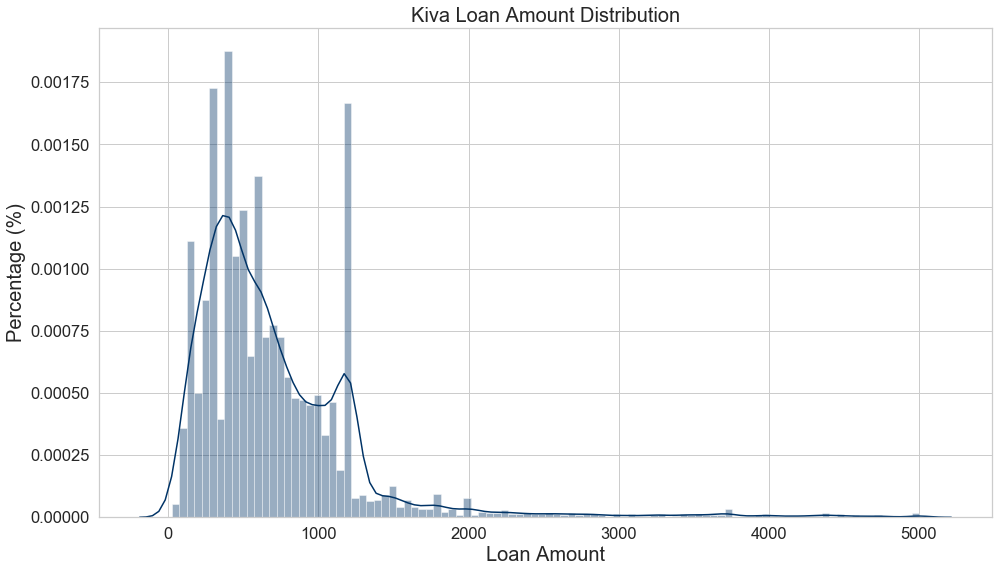

In [17]:
fig = plt.figure(figsize=(16, 9))
sns.distplot(df['loan_amount'],
             color='#003366',
             bins=100,
             hist_kws={'alpha': 0.4})


plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Percentage (%)', fontsize=20) # for each component
plt.title('Kiva Loan Amount Distribution', fontsize=20)

fig.savefig('../reports/figures/1.1-gg-distplot_loan_amount.png', dpi=300, bbox_inches='tight')

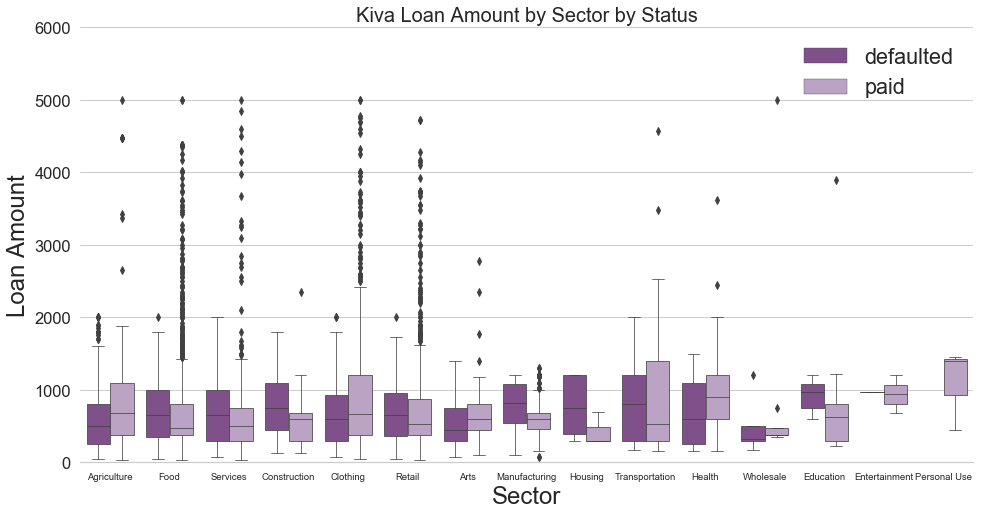

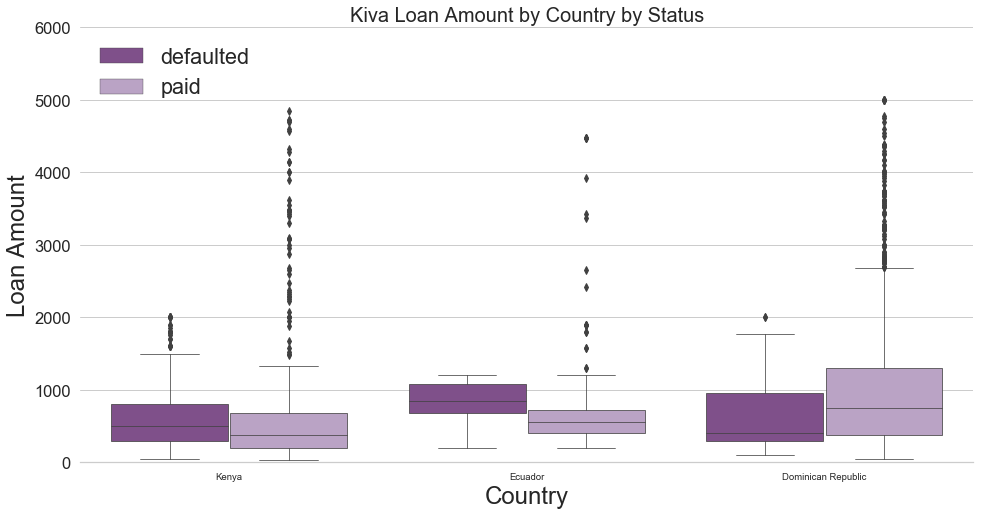

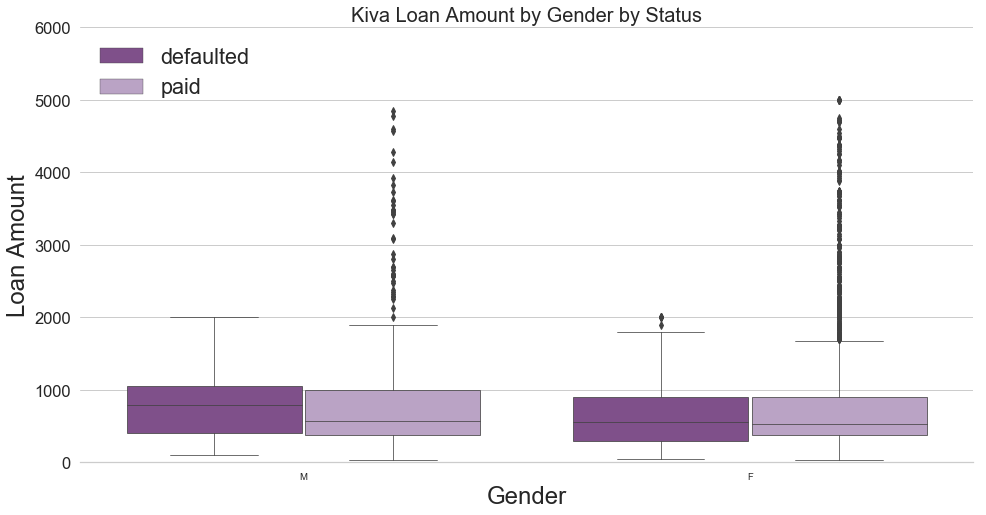

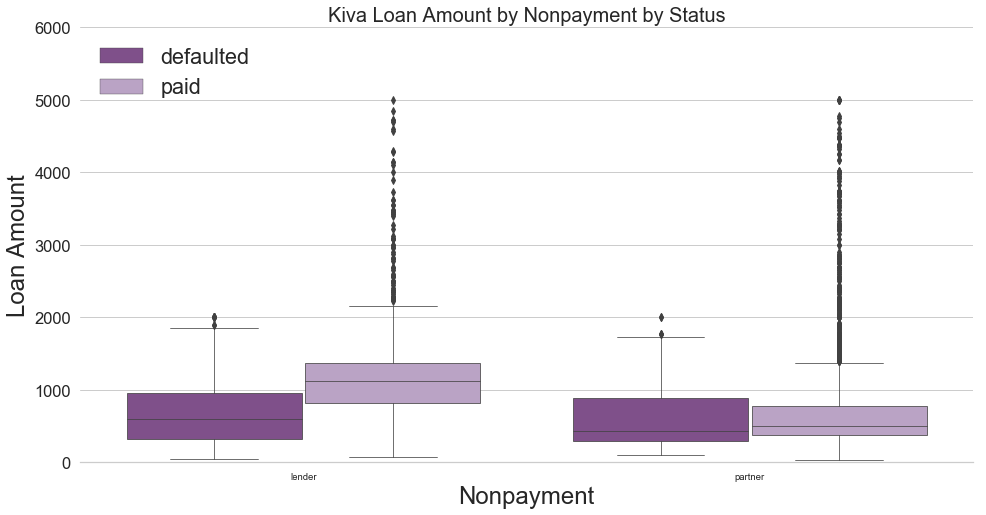

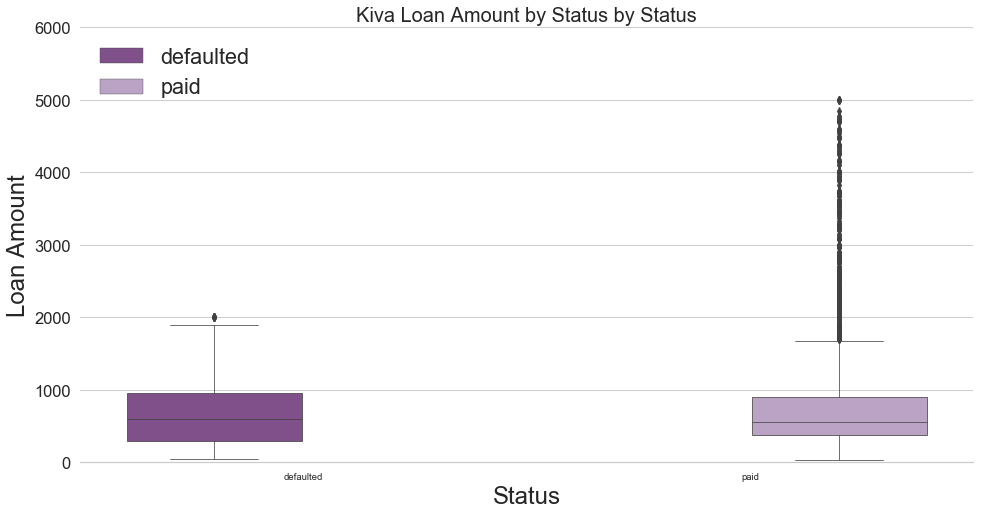

In [18]:
# Plot categorical variables
cat_col = list(df_cat)

fig = None

for column in cat_col:
    if column != 'en':
        fig = plt.figure(figsize=(16, 8))
        fig = sns.boxplot(data=df,
                             x=column,
                             y="loan_amount",
                             hue="status",
                             linewidth=0.75)
        fig.set_xticklabels(fig.get_xticklabels(), fontsize=9.5, wrap=True)
        sns.despine(left=True)
        plt.ylim(0, 6000)
        plt.legend(fontsize='large')
        plt.title('Kiva Loan Amount by {} by Status'.format(column.capitalize()), fontsize=20)
        fig.set_xlabel(column.capitalize(),fontsize=24)
        fig.set_ylabel("Loan Amount", fontsize=24)
        
        fig = fig.get_figure()
        fig.savefig('../reports/figures/1.1-gg-boxplot_loan_amount_by_{}_by_status.png'.format(column), 
                        dpi=300, 
                        bbox_inches='tight');

<Figure size 1152x648 with 0 Axes>

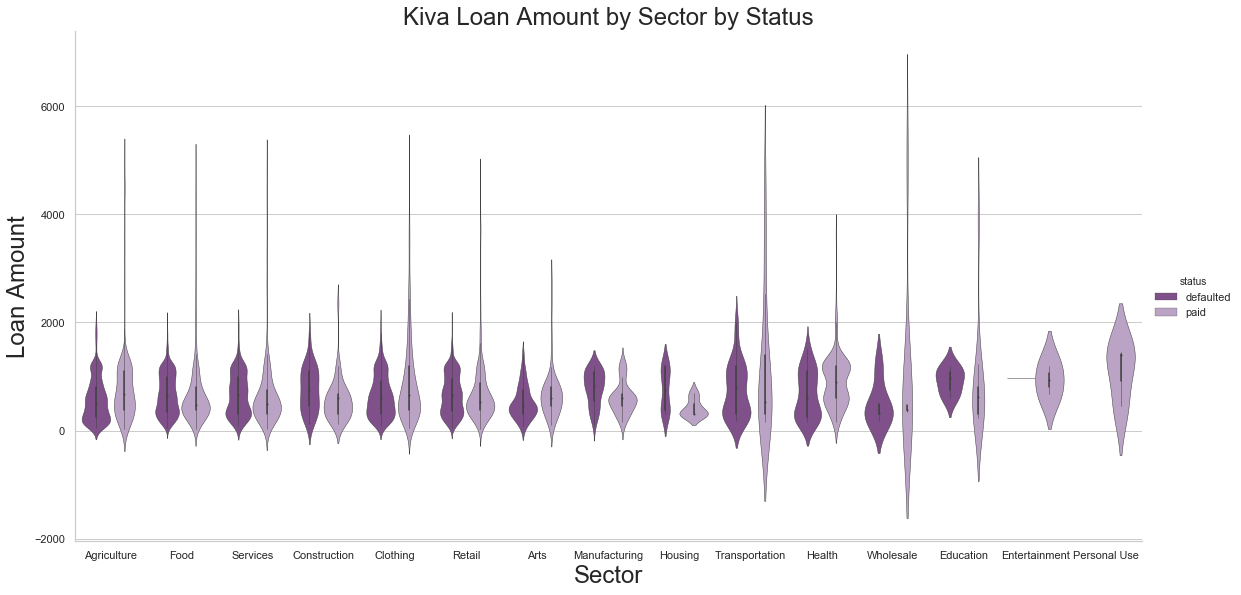

<Figure size 1152x648 with 0 Axes>

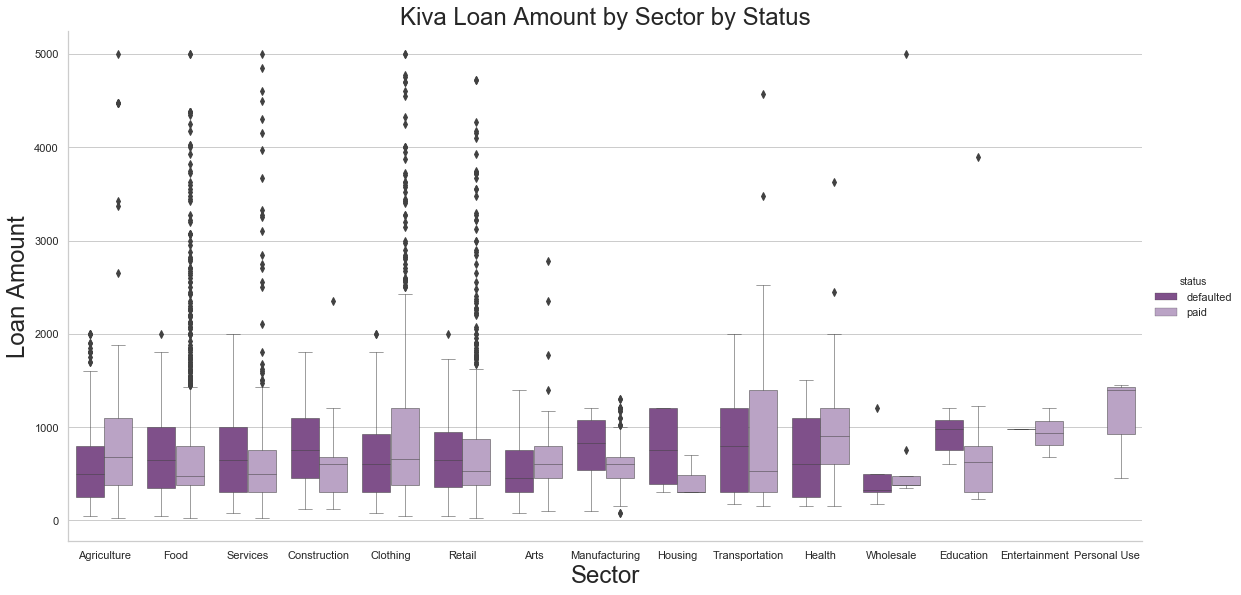

<Figure size 1152x648 with 0 Axes>

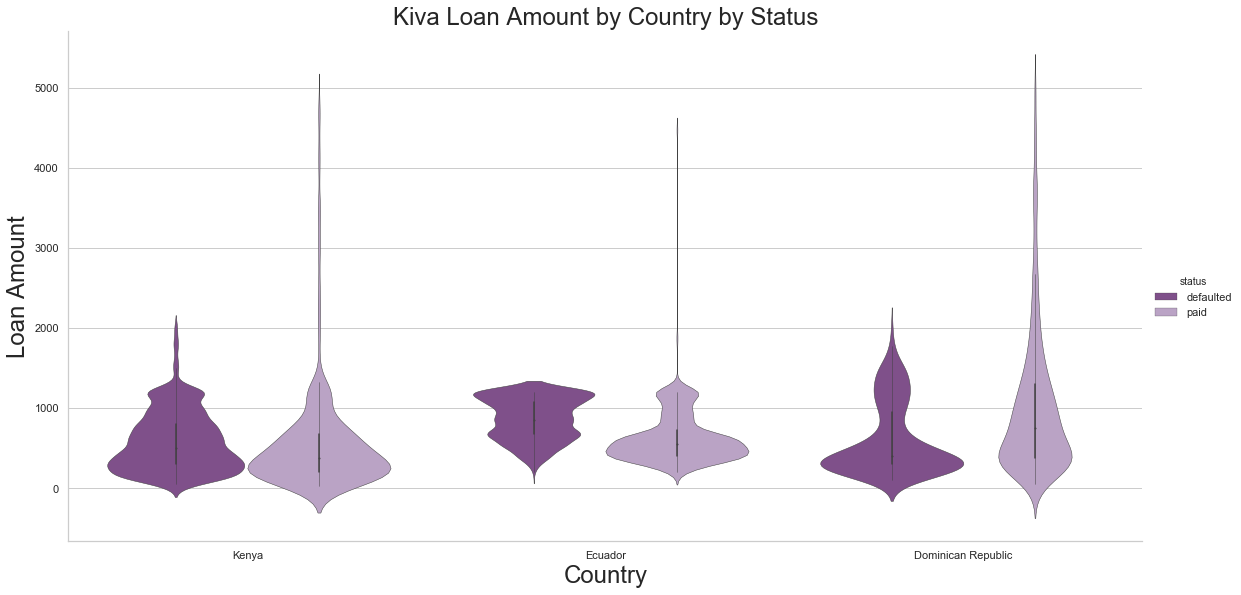

<Figure size 1152x648 with 0 Axes>

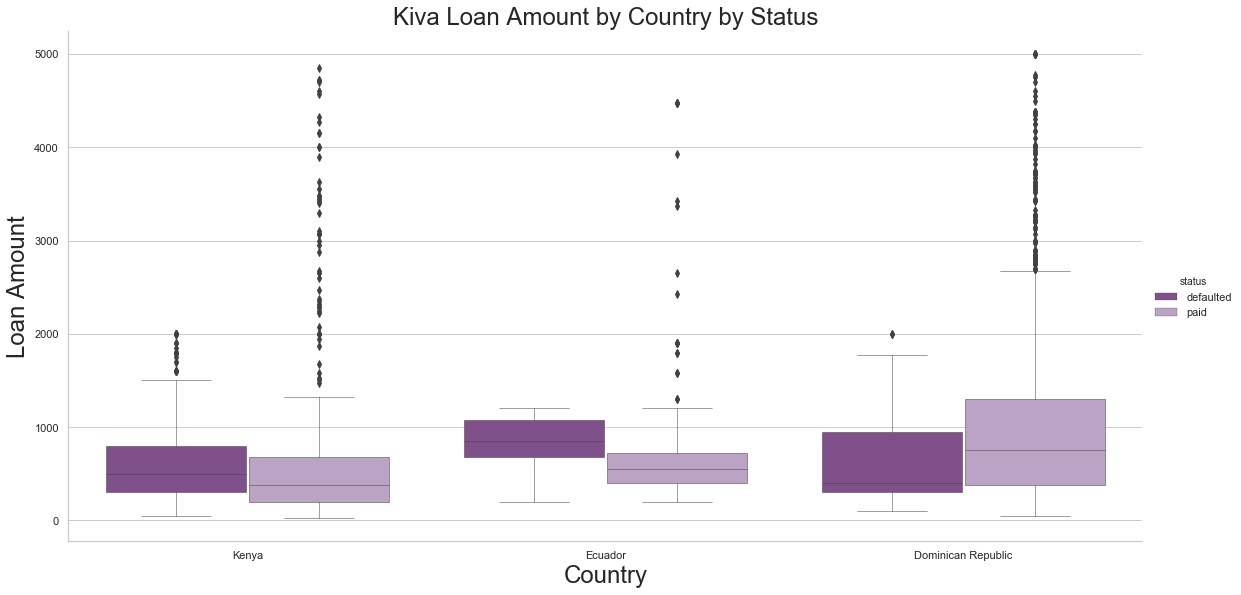

<Figure size 1152x648 with 0 Axes>

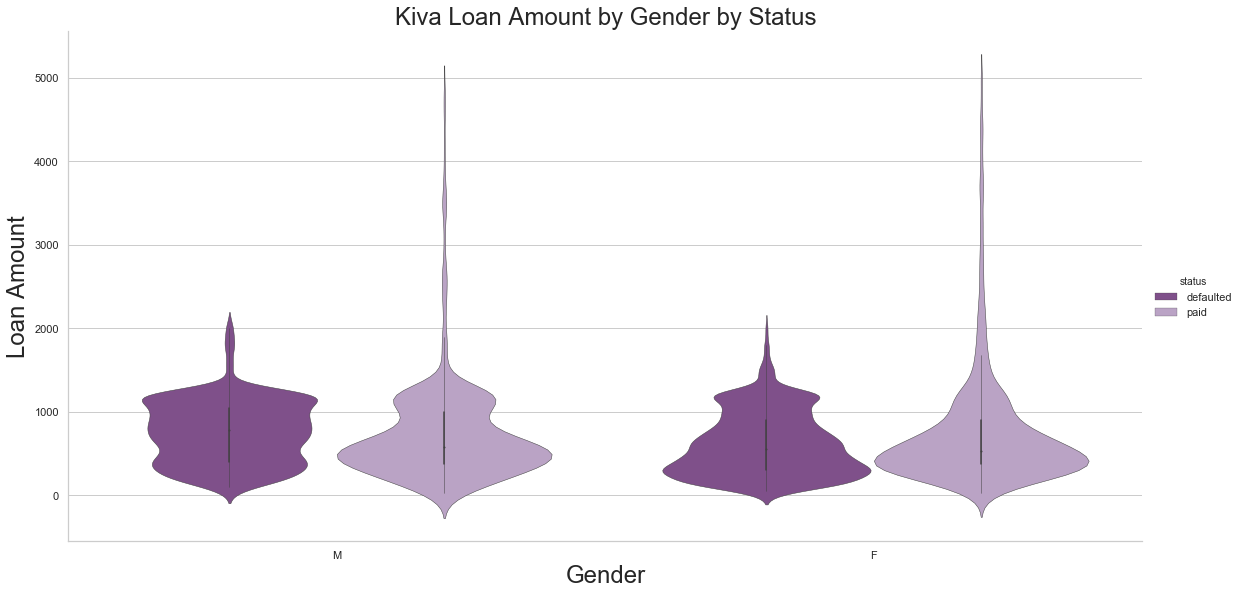

<Figure size 1152x648 with 0 Axes>

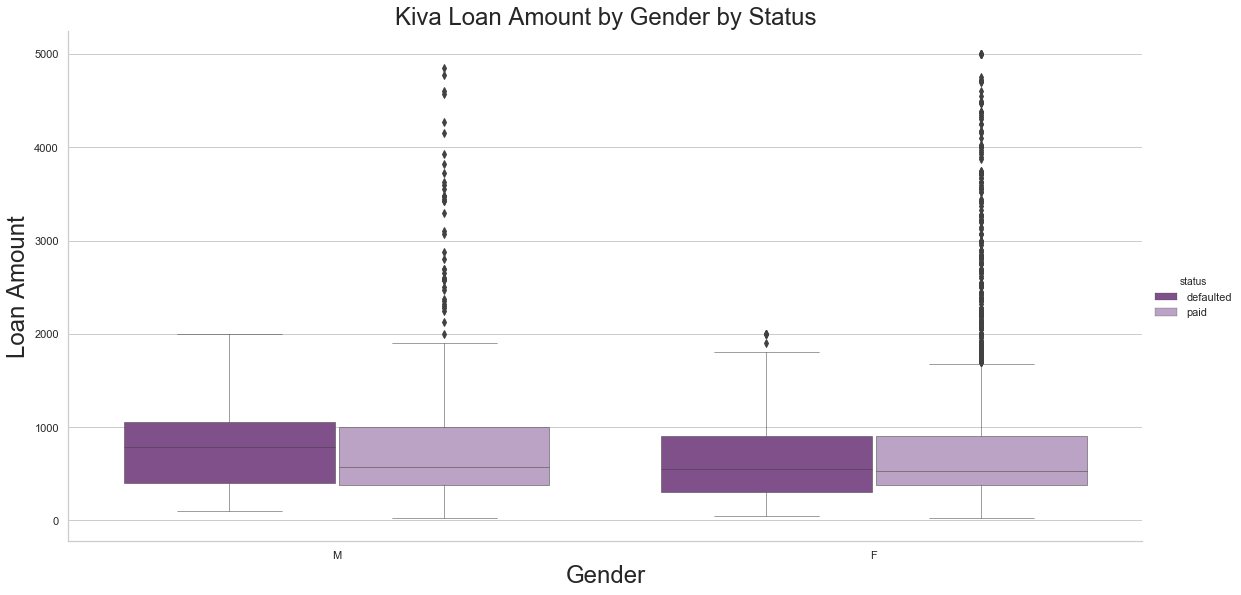

<Figure size 1152x648 with 0 Axes>

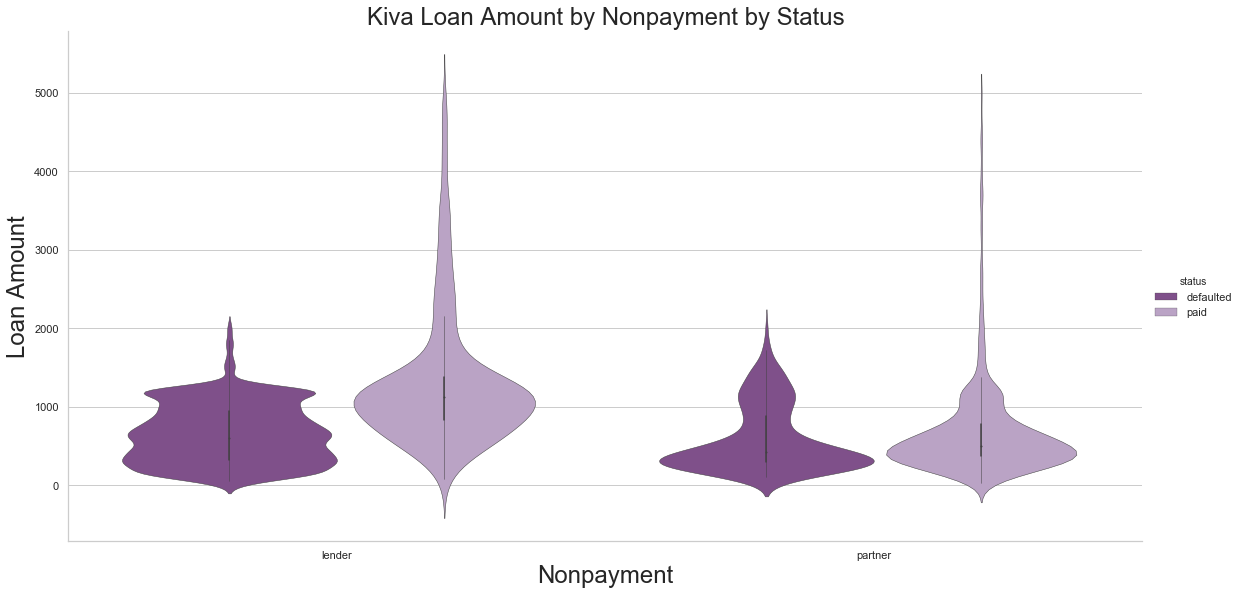

<Figure size 1152x648 with 0 Axes>

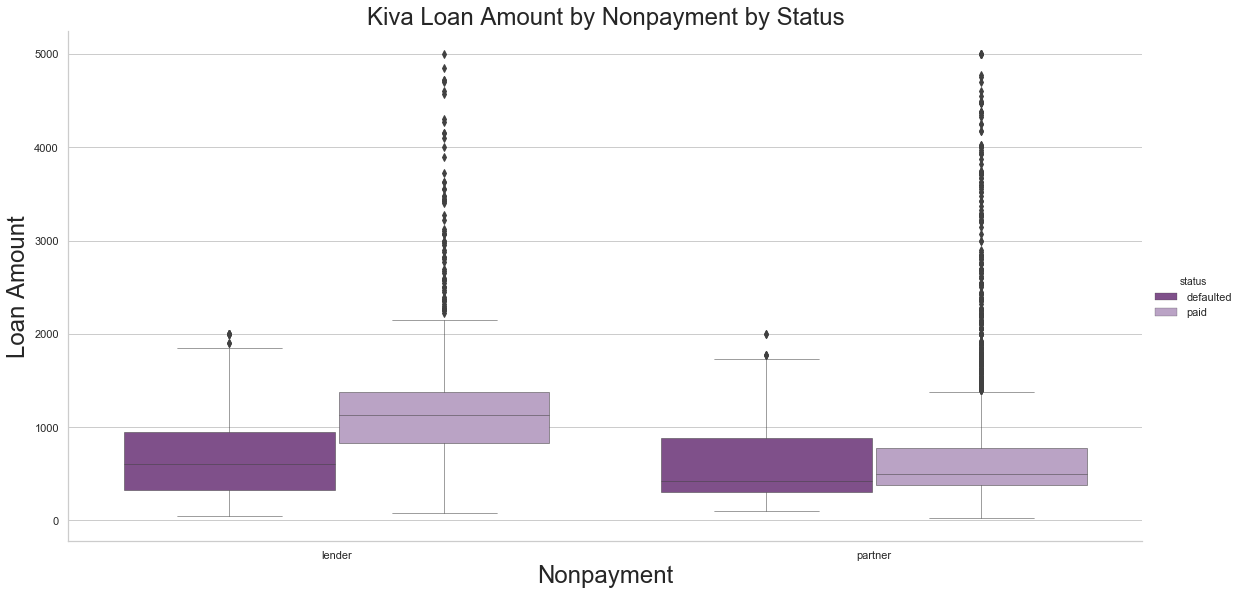

<Figure size 1152x648 with 0 Axes>

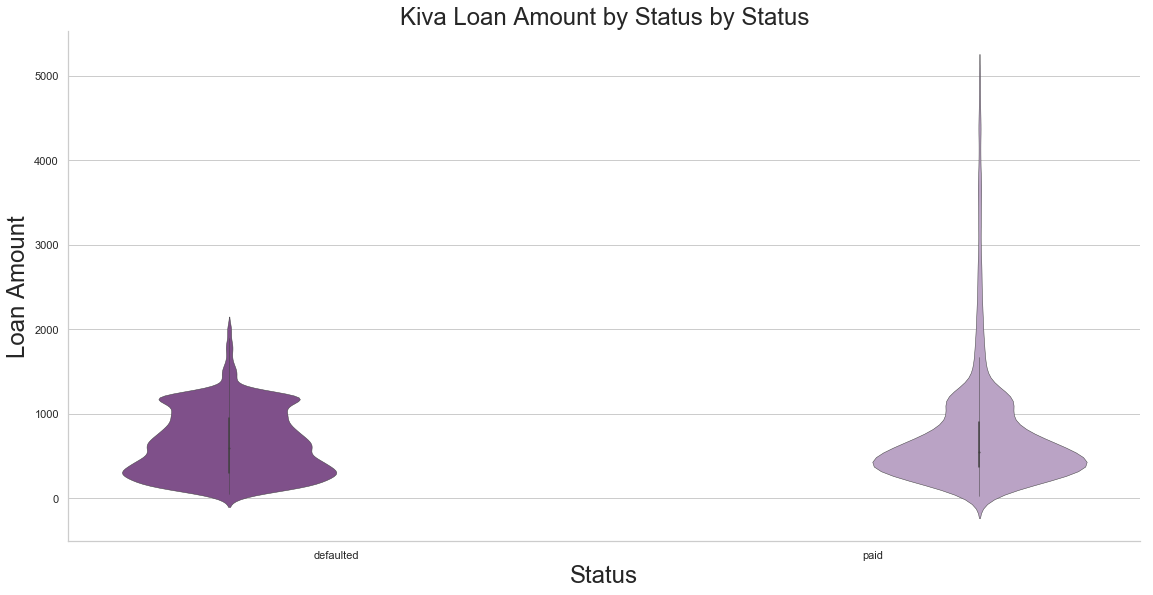

<Figure size 1152x648 with 0 Axes>

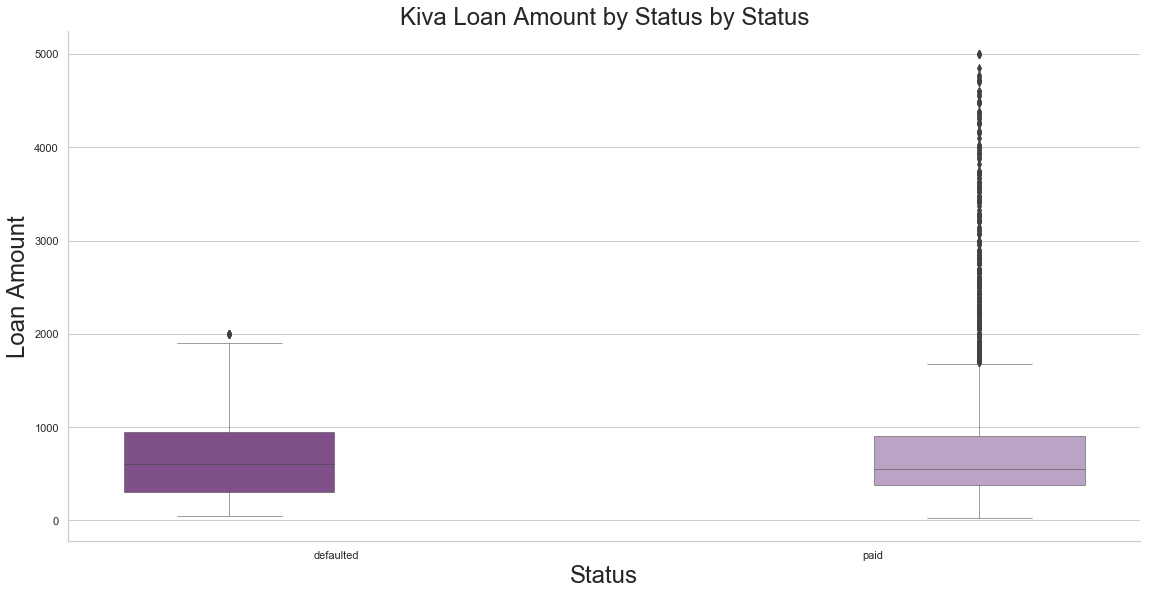

In [19]:
# Plot categorical variables
cat_col = list(df_cat)
#kinds = ['violin', 'box', 'boxen', 'bar']
kinds = ['violin', 'box']

fig = None

sns.set(style="whitegrid", palette="PRGn", color_codes=True, font='sans-serif', font_scale=1)

for column in cat_col:
    if column != 'en':
        for kind in kinds:
            fig = plt.figure(figsize=(16, 9))
            fig = sns.catplot(data=df,
                              x=column,
                              y="loan_amount",
                              hue="status",
                              linewidth=0.5,
                              height=8,
                              aspect=2,
                              kind=kind)
            plt.title('Kiva Loan Amount by {} by Status'.format(column.capitalize()), fontsize=24)
            plt.xlabel(column.capitalize(), fontsize=24)
            plt.ylabel('Loan Amount', fontsize=24)
 
            fig.savefig('../reports/figures/1.1-gg-catplot_{}_loan_amount_by_{}_by_status.png'.format(kind, column), 
                        dpi=300, 
                        bbox_inches='tight');
            
sns.set(style="whitegrid", palette="PRGn", color_codes=True, font='sans-serif', font_scale=1.5)